# How I Engineered a Dataset to Capture Risk, Reliability, and Billing Outcomes For A Utility Company

*This article is Part 1 of a 3-Part Series on Credit Risk Modeling and Monitoring. In this article, we built a realistic synthetic dataset that mimics real-world utility behavior and sets the stage for machine learning and reporting.*

## 1. Introduction

### Motivation: Predicting Risk Before It Becomes Loss

In utility operations, financial losses don’t happen all at once—they unfold gradually: missed payments, rising penalties, repeated suspensions, and eventually, account closure. While working on a credit risk analytics project at Manitoba Hydro, I saw just how significant detecting these patterns can be—and the financial impact they carry.

That experience underscored the value of early detection and proactive intervention. Rather than reacting to delinquency after it escalates, there’s a clear opportunity to model risk as it develops—giving credit teams time to act.

That insight inspired this three-part project series, where I built a complete solution to simulate, predict, and visualize customer credit risk:

- ✅ **Part 1: Data Simulation (This article)** – Created a rule-based simulation engine that models billing, payments, penalties, and lifecycle events for over 3,000 synthetic utility accounts.
- 🔄 **Part 2: Machine Learning Classification** – Used those behavioral patterns to train a predictive model that classifies customer risk tiers.
- 📊 **Part 3: Power BI Report** – Turned model predictions into a real-time, explainable dashboard for business and credit teams.

In this article, we’ll start at the foundation—building a dataset that doesn’t just mimic utility behavior, but embeds risk logic into every outcome. That’s what makes the later machine learning and dashboard layers meaningful.


### 📘 What This Article Covers

This article walks through how I built a rule-based simulation of customer utility behavior—complete with lifecycle events, risk scoring, and monthly reporting. Here’s what you’ll find:

**Section 2: Simulation Goals and Design**

- Sets the objectives of the simulation—why we needed synthetic data and what real-world behaviors we aimed to capture.

**Section 3: Lifecycle Logic**

- Details how each customer moves through billing, payment, penalty, suspension, and closure phases—mirroring real account trajectories.

**Section 4: Dataset Tables**

- Breaks down the core output tables and how they track customer behavior over time—feeding directly into ML-ready formats.

**Section 5: Sample Accounts**

- Presents real examples from the simulated data—illustrating clean vs. delinquent trajectories over time.

**Section 6: Core Simulation Logic**

- Walks through the mechanics behind penalties, delinquency scores, payment compliance, and account reliability scores.

**Section 7: Recap and Reflections**

- Summarizes what the simulation accomplishes and how it sets the foundation for downstream risk modeling.

By the end of this article, you’ll see how simulation—done right—can serve as both a data source and a business logic engine for real-world credit risk analytics.


## **2. Simulation Goals and Design**

### **Why Simulate?**

In real-world credit risk projects, access to historical data is often limited by privacy, coverage gaps, or inconsistent account histories. Even when data is available, it rarely includes clean, labeled examples of risk escalation—especially for rare but costly outcomes like account closure due to non-payment.

To overcome this, I built a behavior-first simulation engine—one that mirrors how utility accounts behave over time, not just in static snapshots. The idea wasn’t to generate random data. It was to model financial pressure as a process—so every suspension, penalty, or closure stems from prior decisions and behaviors.

### **What the Simulation Needed to Capture**

To support downstream modeling and monitoring, the simulation had to produce realistic, structured behavior—not random events. It needed to reflect four essential qualities:

-	**Behavioral Integrity:** Customers’ behavior should follow stable and semi-consistent trajectories. Just like in the real world, some customers are inherently more dependable than others. Each account’s actions should unfold logically over time, forming patterns that are consistent with their underlying reliability trait.

-	**Behavioral Diversity:** The simulation had to represent a range of customer types—with different usage levels, rate plans, and payment behaviors. This creates natural variation in billing amounts and delinquency risk.

-	**Behavioral Tracking Features:** The dataset needed rich monthly signals—charges, payments, penalties, and recovery indicators—that would later support machine learning and reporting tasks.

-	**Consistent and Sensible Logic:** Most importantly, outcomes like suspensions or closures needed to result from clear, traceable behaviors—so every escalation has a reason the model can learn from and analysts can explain.

### **Key Design Decisions**

To meet these goals, the simulation was built around several foundational mechanics—each designed to reflect real utility operations while producing data with structure and meaning:

-	**Monthly Billing Cycles:** Every account follows a standard monthly billing schedule, with usage-based charges, due dates, and rolling balances. This mirrors the cadence of real-world billing systems.

-	**Customer Payment Behavior:** Payments aren’t hard-coded—they’re driven by each customer’s underlying reliability trait. Some pay early and in full, others delay, underpay, or skip entirely. This creates behavioral variance with intention.

-	**Monthly Balance Tracking:** Each cycle begins with a balance check. Accounts with unpaid charges accrue penalty points, which drive changes in delinquency score—making account standing a dynamic signal.

-	**Suspension and Closure Logic:** As delinquency scores rise, accounts face escalating consequences: first suspension, then eventual closure and write-off. These outcomes are triggered by clear thresholds, not randomness.


Together, these components simulate full behavioral arcs—from activation to escalation to resolution. That structure is what makes the dataset not just synthetic, but predictive—ready for modeling in Part 2.


## 3. Lifecycle Logic: How Customer Behavior Evolves

To model credit behavior accurately, we needed to simulate the full customer lifecycle—not just isolated events. That meant building a system where behavior, financial standing, and account status change month by month, driven by internal logic.

Each billing cycle follows the same structured flow, capturing both customer actions and system responses:

### 🔁 Monthly Simulation Loop

Each month, the simulation engine runs a series of steps for every active account:

1. **Usage Generation**  
   Accounts generate electricity consumption based on their assigned usage profile (low, medium, or high). This becomes the basis for billing.

2. **Bill Creation**  
   The system calculates the monthly charge using the customer’s rate plan, adds any unpaid balance, and issues a new bill with a due date.

3. **Payment Simulation**  
   Customers decide whether to pay—and how much—based on their reliability score. Reliable customers tend to pay on time and in full; riskier ones may pay late, underpay, or miss payments entirely.

4. **Balance Check & Penalty Assessment**  
   At the start of the next cycle, the system reviews payments and applies penalty points for unpaid balances—ranging from minor (0.5) to full (2.0) delinquency scores.

5. **Status Escalation (if needed)**  
   When an account’s delinquency score crosses key thresholds:  
   - At 5.0 points → Suspended (usage halts until payment resumes)  
   - At 10.0 points → Closed (account written off as bad debt)

6. **Snapshot Logging**  
   A snapshot is recorded for each account at the beginning of every cycle—capturing usage, payments, balances, penalties, and account status.

This monthly structure gives the dataset its shape. Each missed payment, penalty, or status change reflects a pattern of behavior, not random noise. That’s what makes the data valuable for downstream modeling and reporting.

### 🧠 How Behavior Is Simulated

At the core of the simulation is each customer’s reliability score—a latent trait between 0.1 and 1.0. This score influences the customer’s intent to pay in each cycle, shaping—probabilistically—when, how much, or even whether they choose to pay.

- High reliability → early and full payments  
- Moderate reliability → delayed or partial payments, occasional misses  
- Low reliability → frequent delays, underpayment, or skipped payments entirely

This setup creates behavior that is semi-consistent but varied, producing realistic payment patterns across the customer base. Over time, these trajectories evolve into signals of stability or escalating risk—ideal inputs for classification in Part 2.

### 📉 Risk and Penalty Scoring

At the start of each billing cycle, the system checks each account’s unpaid balance and applies penalties based on the following logic:

| % Unpaid | Delinquency Type | Penalty Score |
|----------|------------------|----------------|
| 0%       | None             | 0.0            |
| <33%     | Minor            | 0.5            |
| <66%     | Partial          | 1.0            |
| <100%    | Major            | 1.5            |
| 100%     | Full             | 2.0            |

Penalty scores are cumulative and determine when escalation occurs:
- 5.0 points → Account is suspended  
- 10.0 points → Account is closed and written off

If an account pays off its balance in full, the score resets—mirroring the chance for recovery in real-world systems.

In the next section, we’ll explore how this logic populates the dataset tables—turning simulated customer behavior into structured, ML-ready data.



## 4. Dataset Tables and Record Structure

The simulation outputs a multi-table dataset that mirrors how a real utility system tracks accounts over time. Each table captures a different part of the billing lifecycle—providing structure, context, and behavioral signals that feed directly into later machine learning and reporting tasks.

Following is a breakdown of the key tables:


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

pd.set_option('display.max_columns', None)

# Load the dataset
RAW_DATA_DIR = "data/demo"

accounts = pd.read_csv(f'{RAW_DATA_DIR}/accounts.csv', parse_dates=['start_date'])
accounts_hidden_features = pd.read_csv(f'{RAW_DATA_DIR}/accounts_hidden_features.csv')
customers = pd.read_csv(f'{RAW_DATA_DIR}/customers.csv', parse_dates=['join_date'])
customers_hidden_features = pd.read_csv(f'{RAW_DATA_DIR}/customers_hidden_features.csv')
usages = pd.read_csv(f'{RAW_DATA_DIR}/usages.csv', parse_dates=['cycle_start','cycle_end'])
billings = pd.read_csv(f'{RAW_DATA_DIR}/billings.csv', parse_dates=['cycle_start','cycle_end','date_issued','date_due'])
payments = pd.read_csv(f'{RAW_DATA_DIR}/payments.csv', parse_dates=['payment_date'])
balance_snapshots = pd.read_csv(f'{RAW_DATA_DIR}/balance_snapshots.csv', parse_dates=['check_date'], keep_default_na=True).fillna("None")
bad_debts = pd.read_csv(f'{RAW_DATA_DIR}/bad_debts.csv', parse_dates=['closing_date'])


### 👥 Customers

A static reference table that defines who’s in the system.
- Customer ID, Name  
- Customer Type: Residential or Commercial  
- Join Date  

Customers are generated at the start of the simulation and drive account creation behavior.


In [2]:
print(f"Customers shape: {customers.shape}")
customers.head()

Customers shape: (3000, 5)


,customer_key,customer_id,name,customer_type,join_date
0,10001,77c6638c-3467-49cb-8bad-8295000b7c8a,Alan Guerrero,Commercial,2020-01-01
1,10002,34ecbf42-0686-4ad6-a938-ec5ff05cad7c,Justin Rhodes,Residential,2020-01-01
2,10003,205f81e5-0865-4223-aa76-871a97a8f129,Brandon Carpenter,Residential,2020-01-01
3,10004,714df8d9-9015-4dfa-8b9e-8ea6aa7b8517,Troy Williams,Residential,2020-01-01
4,10005,85f98289-0cf6-4815-86f5-830b97913a6d,Rebecca Brown,Residential,2020-01-01


Customer Type Counts:
customer_type
Residential    2402
Commercial      598
Name: count, dtype: int64


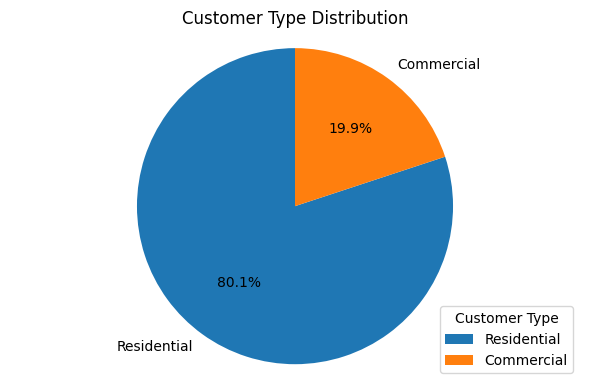

In [3]:
customer_type_counts = customers['customer_type'].value_counts()
print("Customer Type Counts:")
print(customer_type_counts)
plt.figure(figsize=(6, 4))
plt.pie(customer_type_counts, labels=customer_type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Customer Type Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(title='Customer Type', loc='lower right')
plt.tight_layout()
plt.show()


### 🧾 Accounts

Each customer can hold one or more utility accounts over time.
- Account ID, Customer ID  
- Start Date  
- Plan Rate (based on customer type)  

Accounts track their own balance history, usage behavior, and payment outcomes.


In [4]:
print("Accounts shape:", accounts.shape)
accounts.head()


Accounts shape: (13988, 5)


,account_key,account_id,customer_id,plan_rate,start_date
0,100001,5b704d10-8488-4d9e-9c33-258c600f0a8a,714df8d9-9015-4dfa-8b9e-8ea6aa7b8517,0.22,2020-01-01
1,100002,bdc59eb9-7bcc-4f5d-83cc-97de7c682df3,d4f64bd2-9020-46e6-b611-173f07095123,0.22,2020-01-01
2,100003,c0e52417-e91f-4f71-b2f2-549c15ec8605,b7bfa5ac-de95-4f48-8c19-daba2096edff,0.22,2020-01-01
3,100004,a9b2988d-37b1-4f0c-8d67-309f84f95e14,15b0d067-b7b2-4e6a-b72f-19725c61ae43,0.35,2020-01-01
4,100005,3de17041-71d8-4e85-b13b-eb8a86712a87,a7d7481f-9800-4343-9f2c-379796a38cfd,0.22,2020-01-01


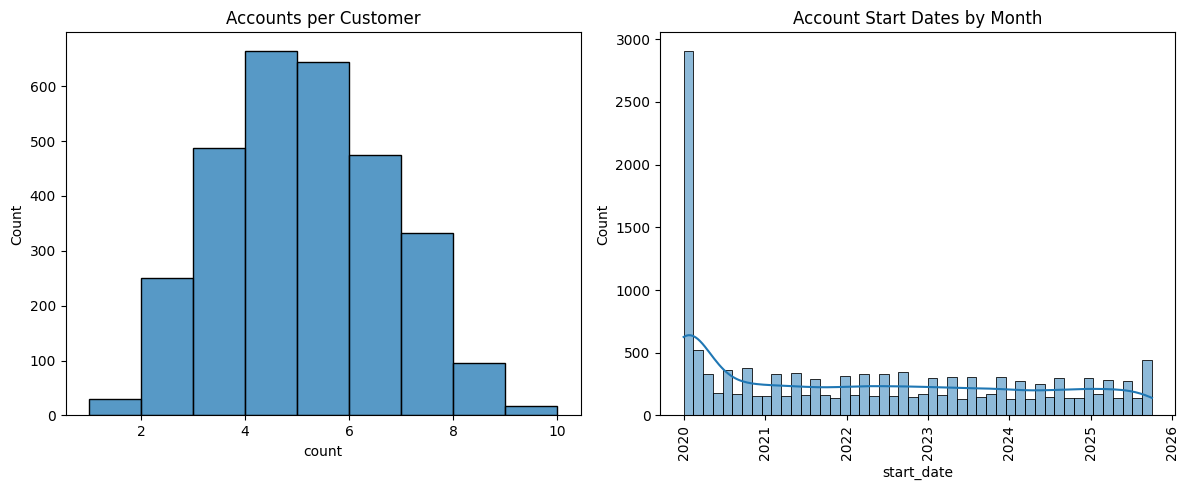

In [5]:
# Display customers with the most accounts
accounts_per_customer = accounts['customer_id'].value_counts()
# Display histogram of accounts per customer
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(accounts_per_customer, binwidth=1, kde=False)
plt.title('Accounts per Customer')

# Histogram of accounts per customer
plt.subplot(1, 2, 2)
# Histogram of account start dates (grouped into month-year)
accounts_start_dates = accounts['start_date'].dt.to_period('M').dt.to_timestamp()
sns.histplot(accounts_start_dates,bins=48, kde=True)
plt.title('Account Start Dates by Month')
# Rotate x-ticks for better readability
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


### 🔌 Usages

Monthly energy consumption per account, used to calculate billing amounts.
- Account ID, Date, kWh Used  
- Cycle start, end

Accounts stop generating usage when suspended or closed.


In [6]:
print('Usages Table:', usages.shape)
display(usages.head())

Usages Table: (585569, 6)


,usage_key,usage_id,account_id,cycle_start,cycle_end,usage_kwh
0,1,dba81657-fba6-422d-84dd-cffb56a7fe5e,5b704d10-8488-4d9e-9c33-258c600f0a8a,2020-01-01,2020-01-30,642.825196
1,2,99c6106b-92b6-40ae-9562-bc65d8457e71,0fcb4bfb-c5fa-4c1b-81af-2fcbe9f58919,2020-01-01,2020-01-30,312.630147
2,3,91cbd7a9-d106-42e4-a53b-7e10ed65f6ae,529d527c-b759-4791-9d54-4a344049f6b4,2020-01-01,2020-01-30,325.726202
3,4,8afa87b8-4b0b-4829-8d72-b34fa6e093fa,61da90fb-e667-4e76-abdc-3769586f5acd,2020-01-01,2020-01-30,292.419529
4,5,72997f17-82ca-47d7-b9e7-f3e87d976cce,1515d293-dca0-4978-93c2-afd5697f5a62,2020-01-01,2020-01-30,204.257435


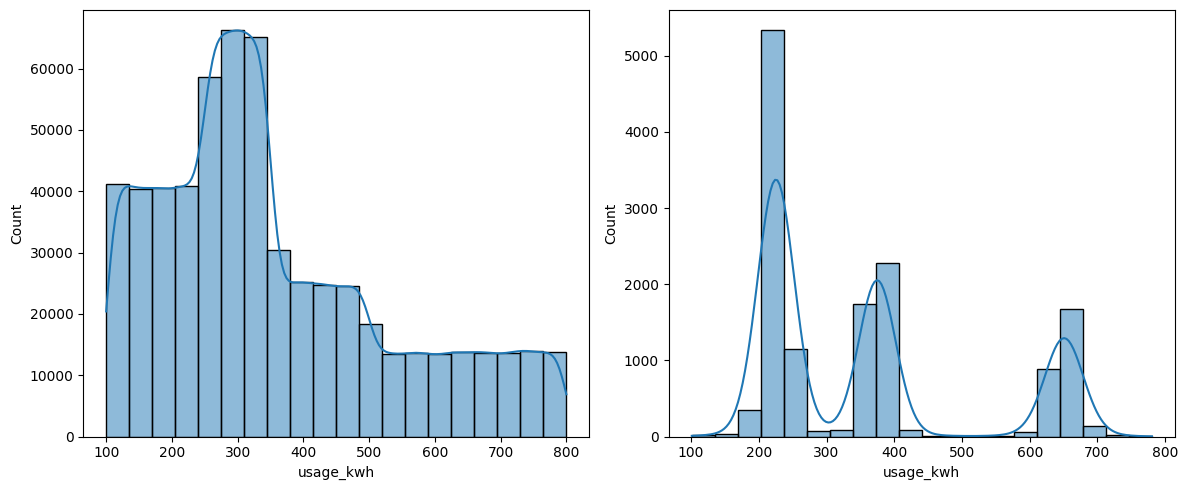

In [7]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(usages['usage_kwh'], bins=20, kde=True)
plt.subplot(1, 2, 2)
avg_usage_per_customer = usages.groupby('account_id')['usage_kwh'].mean().reset_index()
sns.histplot(avg_usage_per_customer['usage_kwh'], bins=20, kde=True)
plt.tight_layout()
plt.show()


### 💳 Billings

The system-generated monthly bill for each account.
- Billed Period  
- Previous Balance, Payments Received, New Charges  
- Total Balance Due  
- Due Date  

Bills reflect both new usage and any unpaid carryover.


In [8]:
print('Billings Table:', billings.shape)
display(billings.head())


Billings Table: (608547, 14)


,billing_key,billing_id,account_id,cycle_start,cycle_end,usage_kwh,plan_rate,previous_balance,payment_total,carryover_balance,new_charges,total_balance,date_issued,date_due
0,1,a3a1f712-8d06-4c93-97f9-f59c1eb3d6ae,5b704d10-8488-4d9e-9c33-258c600f0a8a,2020-01-01,2020-01-30,642.825196,0.22,0.0,0.0,0.0,141.421543,141.42,2020-01-31,2020-03-01
1,2,014a57c1-6803-4b58-8ecc-fc084471913d,0fcb4bfb-c5fa-4c1b-81af-2fcbe9f58919,2020-01-01,2020-01-30,312.630147,0.22,0.0,0.0,0.0,68.778632,68.78,2020-01-31,2020-03-01
2,3,5030aa60-392f-4bcd-9a5e-ab403775a31d,529d527c-b759-4791-9d54-4a344049f6b4,2020-01-01,2020-01-30,325.726202,0.22,0.0,0.0,0.0,71.659764,71.66,2020-01-31,2020-03-01
3,4,4c0467eb-ef1e-4ac1-9c45-00f63a15fcdd,61da90fb-e667-4e76-abdc-3769586f5acd,2020-01-01,2020-01-30,292.419529,0.22,0.0,0.0,0.0,64.332296,64.33,2020-01-31,2020-03-01
4,5,434288d2-807b-486a-b1c2-fc40589f46a0,1515d293-dca0-4978-93c2-afd5697f5a62,2020-01-01,2020-01-30,204.257435,0.22,0.0,0.0,0.0,44.936636,44.94,2020-01-31,2020-03-01


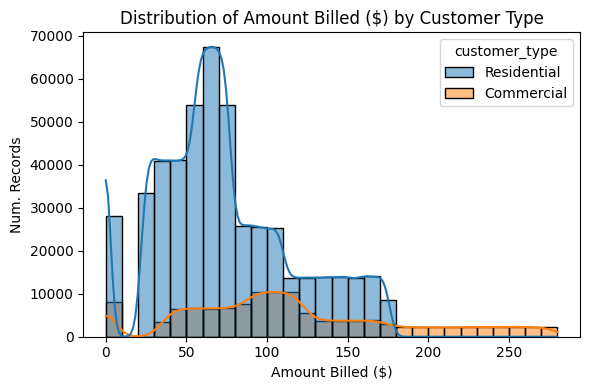

In [9]:
billings_merged = billings.copy().merge(accounts, on='account_id', how='left').merge(customers, on='customer_id', how='left')

# Visualize billings total_balance distribution by customer_type using overlapping histograms 
plt.figure(figsize=(6, 4))
sns.histplot(data=billings_merged, x='new_charges', hue='customer_type', binwidth=10, kde=True, legend=True, alpha=0.5)
plt.xlabel('Amount Billed ($)')
plt.ylabel('Num. Records')
plt.title('Distribution of Amount Billed ($) by Customer Type')
plt.tight_layout()
plt.show()


### 💸 Payments

Each payment event includes timing, amount, and behavioral nuance.
- Payment Date and Amount  
- Linked Billing ID  
- Customer Reliability Influence: Determines if payments are full, partial, late, or missed  

This table reflects real-world variability in how customers meet obligations.


In [10]:
print('Payments Table:', payments.shape)
display(payments.head())

Payments Table: (575241, 8)


,payment_key,payment_id,account_id,payment_date,previous_balance,payment_amount,new_balance,is_fully_paid
0,1,12968a88-7237-4778-85d0-ec4d31b098ea,0fcb4bfb-c5fa-4c1b-81af-2fcbe9f58919,2020-02-20,68.78,68.78,0.00,True
1,2,f076ea49-697b-4b8c-b9a0-bde85e165767,61da90fb-e667-4e76-abdc-3769586f5acd,2020-02-15,64.33,64.33,0.00,True
2,3,f75d63d3-5e39-4b24-9866-82cb7929bf6f,1515d293-dca0-4978-93c2-afd5697f5a62,2020-02-15,44.94,44.94,0.00,True
3,4,a6142e89-049f-40aa-a58f-d49fb29768b2,26c70678-0373-4ac6-8fcb-9ad833b2c6ec,2020-02-15,36.75,28.88,7.87,False
4,5,08b038c4-f286-462d-b8a1-4cdfa77cd225,786e74a8-401c-4f44-baa4-9f3db11c2405,2020-02-15,38.43,30.63,7.80,False


In [11]:
# Number of full payments
full_payments = payments[payments['is_fully_paid']]
print(f"Number of full payments: {len(full_payments)}/ {len(payments)} ({len(full_payments)/len(payments)*100:.2f}%)")

Number of full payments: 387119/ 575241 (67.30%)



### 📈 Balance Snapshots

A time-indexed view of each account at the start of every cycle.
- Balance Due, Delinquency Score  
- Account Status: Active, Suspended, Closed  

This is the core table for modeling—it captures evolving financial standing and is used to label and train risk classifiers in Part 2.


In [12]:
print('Balance Snapshots Table:', balance_snapshots.shape)
display(balance_snapshots.head())

Balance Snapshots Table: (580129, 18)


,snapshot_id,delinquency_check_id,billing_id,account_id,account_status,check_date,total_due,date_due,unpaid_balance,unpaid_balance_ratio,prev_unpaid_balance,prev_delinquency_score,is_delinquent,delinquency_type,delinquency_penalty,delinquency_score,delinquency_status,account_action
0,1,399555c0-4fd2-490a-9bcc-d2e738e8bb3a,a3a1f712-8d06-4c93-97f9-f59c1eb3d6ae,5b704d10-8488-4d9e-9c33-258c600f0a8a,Active,2020-03-01,141.42,2020-03-01,141.42,1.0,0.0,0.0,True,Full,2.0,2.0,Delinquent,Account Marked Delinquent
1,2,fb584ff6-289a-49eb-9363-8b19d8c8854e,014a57c1-6803-4b58-8ecc-fc084471913d,0fcb4bfb-c5fa-4c1b-81af-2fcbe9f58919,Active,2020-03-01,68.78,2020-03-01,0.00,0.0,0.0,0.0,False,None,0.0,0.0,None,No Action
2,3,80a0b4cb-fba0-4125-b9e4-00ce4ed80bcf,5030aa60-392f-4bcd-9a5e-ab403775a31d,529d527c-b759-4791-9d54-4a344049f6b4,Active,2020-03-01,71.66,2020-03-01,71.66,1.0,0.0,0.0,True,Full,2.0,2.0,Delinquent,Account Marked Delinquent
3,4,00395f36-ec31-438d-9a5b-11b2befb0f65,4c0467eb-ef1e-4ac1-9c45-00f63a15fcdd,61da90fb-e667-4e76-abdc-3769586f5acd,Active,2020-03-01,64.33,2020-03-01,0.00,0.0,0.0,0.0,False,None,0.0,0.0,None,No Action
4,5,cb8c8b9d-2f93-409e-a9d6-b468f8ce2d44,434288d2-807b-486a-b1c2-fc40589f46a0,1515d293-dca0-4978-93c2-afd5697f5a62,Active,2020-03-01,44.94,2020-03-01,0.00,0.0,0.0,0.0,False,None,0.0,0.0,None,No Action


Number of unpaid balances: 191110/ 580129 (32.94%)


Text(0.5, 1.0, 'Distribution of Delinquent Proportion (%)')

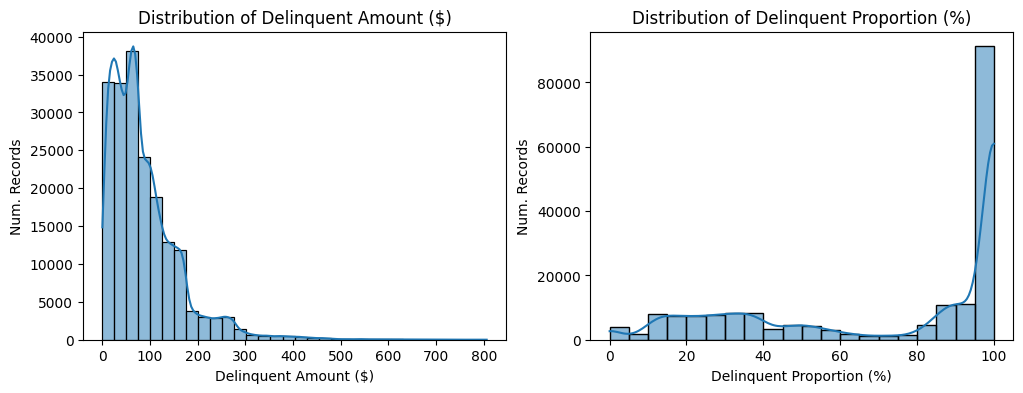

In [13]:
# Visualize the distribution of unpaid_balance
# Number of unpaid balances
unpaid_balances = balance_snapshots[balance_snapshots['is_delinquent']]
print(f"Number of unpaid balances: {len(unpaid_balances)}/ {len(balance_snapshots)} ({len(unpaid_balances)/len(balance_snapshots)*100:.2f}%)")
plt.figure(figsize=(12, 4))
plt.subplot(1,2, 1)
sns.histplot(unpaid_balances['unpaid_balance'], binwidth=25,kde=True)
plt.xlabel('Delinquent Amount ($)')
plt.ylabel('Num. Records')
plt.title('Distribution of Delinquent Amount ($)')

plt.subplot(1,2, 2)
sns.histplot(unpaid_balances['unpaid_balance_ratio']*100, binwidth=5,kde=True)
plt.xlabel('Delinquent Proportion (%)')
plt.ylabel('Num. Records')
plt.title('Distribution of Delinquent Proportion (%)')



### 🚫 Bad Debt (Closures)

Final outcomes for accounts that reach delinquency score thresholds.
- Closure Date  
- Final Balance  
- Closure Reason: Prolonged delinquency  

This table provides ground truth for high-risk outcomes—essential for model labeling and evaluation.


In [14]:
print('Bad Debts Table:', bad_debts.shape)
display(bad_debts.head())

Bad Debts Table: (539, 8)


,bad_debt_key,account_id,account_status,closing_date,closing_balance,delinquency_score,account_delinquency_status,is_bad_debt
0,1,ce6e4e43-a844-49fd-b5df-6f14ee0c66b3,Closed,2020-09-27,22.48,10.0,Closed,True
1,2,2b22e32b-c1e7-4b46-b375-57269d3c6ae3,Closed,2020-09-27,9.64,10.0,Closed,True
2,3,a217d008-a071-4140-ba1c-f231f24fa091,Closed,2020-10-27,232.30,11.0,Closed,True
3,4,903e41f8-d3ff-4ec3-8717-1f2699bcb222,Closed,2020-11-26,253.89,10.0,Closed,True
4,5,aa248b75-582a-470d-b788-a3e0b0ab594f,Closed,2020-11-26,46.99,10.0,Closed,True


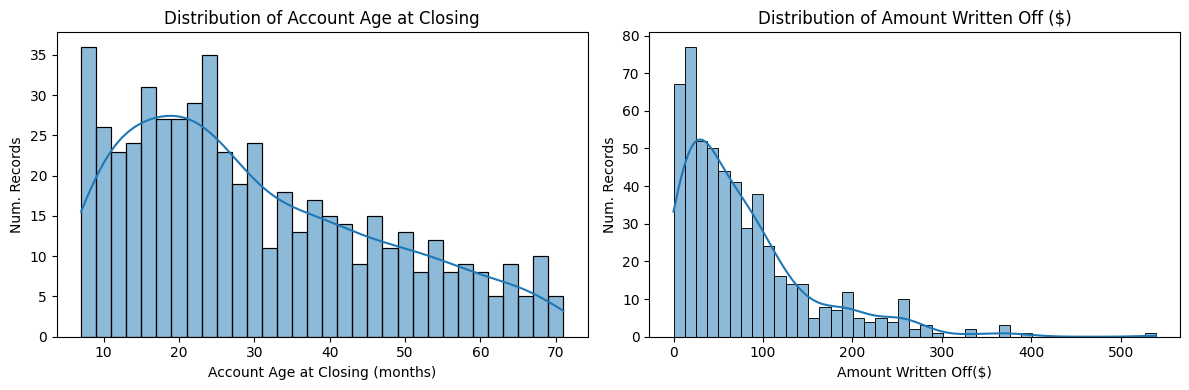

In [15]:
bad_debts_merged = bad_debts.copy().merge(accounts, on='account_id', how='left')
bad_debts_merged['account_age'] = (bad_debts_merged['closing_date'] - bad_debts_merged['start_date']) // pd.Timedelta(days=30)

plt.figure(figsize=(12, 4))
# Visualize the distribution of account_age
plt.subplot(1,2,  1)
sns.histplot(bad_debts_merged['account_age'], binwidth=2, kde=True)
plt.xlabel('Account Age at Closing (months)')
plt.ylabel('Num. Records')
plt.title('Distribution of Account Age at Closing')
# Visualize the distribution of bad debt amounts
plt.subplot(1,2,  2)
sns.histplot(bad_debts_merged['closing_balance'], binwidth=12.5, kde=True)
plt.xlabel('Amount Written Off($)')
plt.ylabel('Num. Records')
plt.title('Distribution of Amount Written Off ($)')

plt.tight_layout()
plt.show()


### 🎯 Latent Traits (Embedded in Simulation Logic)

Though not exposed directly in the output, each customer and account is governed by:
- Reliability Score: Drives payment behavior  
- Usage Profile: Determines energy demand  

These traits generate the behavior we later observe and model.


In [17]:
display(accounts_hidden_features.head())
display(customers_hidden_features.head())

,account_key,usage_profile
0,100001,high
1,100002,low
2,100003,medium
3,100004,medium
4,100005,low


,customer_key,reliability
0,10001,0.614557
1,10002,0.563465
2,10003,0.293768
3,10004,0.367532
4,10005,0.815032


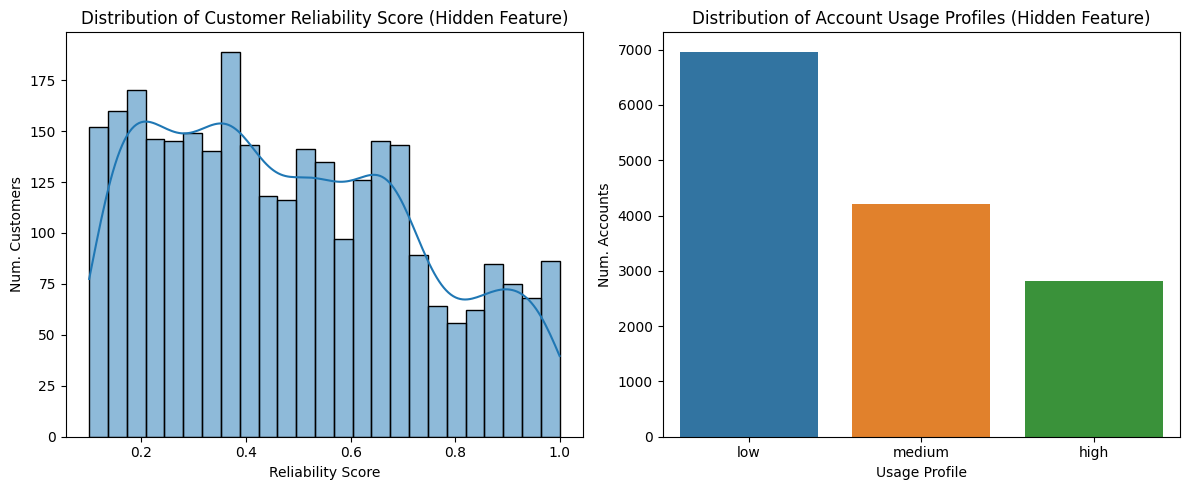

In [18]:
# Visualize the distribution of hidden features
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(customers_hidden_features['reliability'], bins=25, kde=True)
plt.xlabel('Reliability Score')
plt.ylabel('Num. Customers')
plt.title('Distribution of Customer Reliability Score (Hidden Feature)')

plt.subplot(1, 2, 2)
sns.barplot(data=accounts_hidden_features['usage_profile'].value_counts().reset_index(), x='usage_profile', y='count', hue='usage_profile')
plt.xlabel('Usage Profile')
plt.ylabel('Num. Accounts')
plt.title('Distribution of Account Usage Profiles (Hidden Feature)')
plt.tight_layout()



Together, these tables form a complete behavioral record of each account’s lifecycle—supporting feature engineering, risk classification, and dashboarding with clear, traceable logic.

Next, we’ll look at how the simulation engine brings these tables to life through its core mechanics and rule-based decision system.



## 5. Sample Accounts and Behavioral Journeys

To show how the simulation produces realistic and traceable customer behavior, here are three sample accounts—each with a different trajectory: one clean, one suspended, and one closed due to delinquency. These examples illustrate how small behavioral decisions compound over time, leading to clear outcomes.


In [19]:
def plot_account_snapshots_balance_and_delinquency(account_balance_snapshots):
    """
    Plots unpaid balance (bar) and delinquency score (line) for a single account.
    """
    sns.set(style="white")
    plt.figure(figsize=(15, 4))
    ax1 = plt.gca()
    sns.barplot(
        data=account_balance_snapshots,
        x='check_cycle_number',
        y='unpaid_balance',
        color='orange',
        label='Unpaid Balance',
        ax=ax1
    )
    ax1.set_ylabel('Delinquent Amount ($)')
    ax1.set_xlabel('Account Age (Months)')
    ax1.set_xticks(np.arange(2,len(account_balance_snapshots['check_cycle_number']) + 1, 3))
    ax1.set_ylim(0, None)
    ax1.legend().set_visible(False)

    ax2 = ax1.twinx()
    # Use plt.plot for the line to ensure alignment
    ax2.plot(
        account_balance_snapshots['check_cycle_number'] -1,  # Adjust x to match bar positions
        account_balance_snapshots['delinquency_score'],
        # color='blue',
        marker='D',
        label='Delinquency Score'
    )
    ax2.set_ylabel('Delinquency Score')
    ax2.set_ylim(0, 11.5)
    # ax2.set_xticks(account_balance_snapshots['check_cycle_number'])
    ax2.grid(axis='y', linestyle='-', alpha=0.2)
    ax2.axhline(y=5, color='grey', linestyle='--', label='Suspension Threshold (5)')
    ax2.axhline(y=10, color='red', linestyle='--', label='Closing Threshold (10)', alpha=0.5)

    account_id = account_balance_snapshots['account_id'].iloc[0]
    plt.title(f"Unpaid Balance and Delinquency Score for Account ...-{account_id[-10:]}")
    # Combine legends from both axes
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='upper right', bbox_to_anchor=(1.25, 1))
    plt.tight_layout()
    # plt.show()


### 🟢 Account A – Clean and Consistent

- Customer Type: Residential  
- Reliability Score: 0.92  
- Lifecycle: 72 months, fully active  
- Outcome: No penalties, never suspended  

**Behavioral Pattern:**  
This account consistently pays in full and on time, month after month. Even when charges fluctuate slightly due to usage, the customer remains stable. As a result, their delinquency score never rises, and the account remains in good standing throughout the simulation.  
📌 *What it shows:* High reliability produces smooth financial performance. No risk flags are raised at any point.


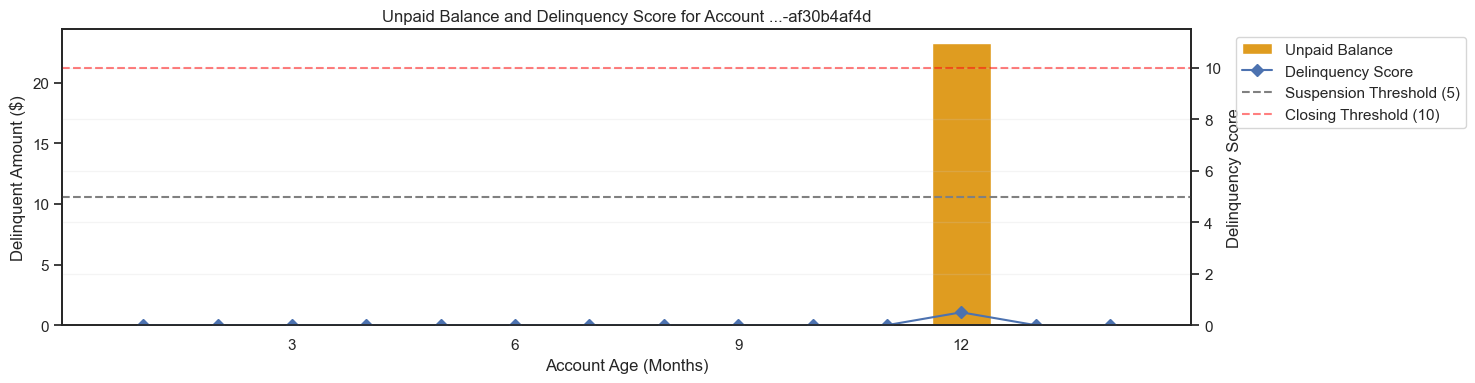

In [20]:
# Sample an account without bad debt
sample_account_id = accounts[~accounts['account_id'].isin(bad_debts['account_id'])].sample(1, random_state=0)['account_id'].values[0]
account_balance_snapshots = balance_snapshots[balance_snapshots['account_id'] == sample_account_id].sort_values(by="check_date", ascending=True)
account_balance_snapshots['check_cycle_number'] = range(1, len(account_balance_snapshots) + 1)
plot_account_snapshots_balance_and_delinquency(account_balance_snapshots)


### 🟡 Account B – Suspended but Recoverable

- Customer Type: Commercial  
- Reliability Score: 0.55  
- Lifecycle: 60 months, suspended once  
- Outcome: Resumed service after partial repayment  

**Behavioral Pattern:**  
This customer shows mixed behavior—frequent partial payments, a few missed payments, and accumulating penalties. Around month 30, the delinquency score crosses 5.0, triggering a temporary suspension. After missing service for a few months, the customer pays down their balance and is reinstated.  
📌 *What it shows:* Medium-reliability accounts can deteriorate but also recover, making them ideal for ongoing monitoring.


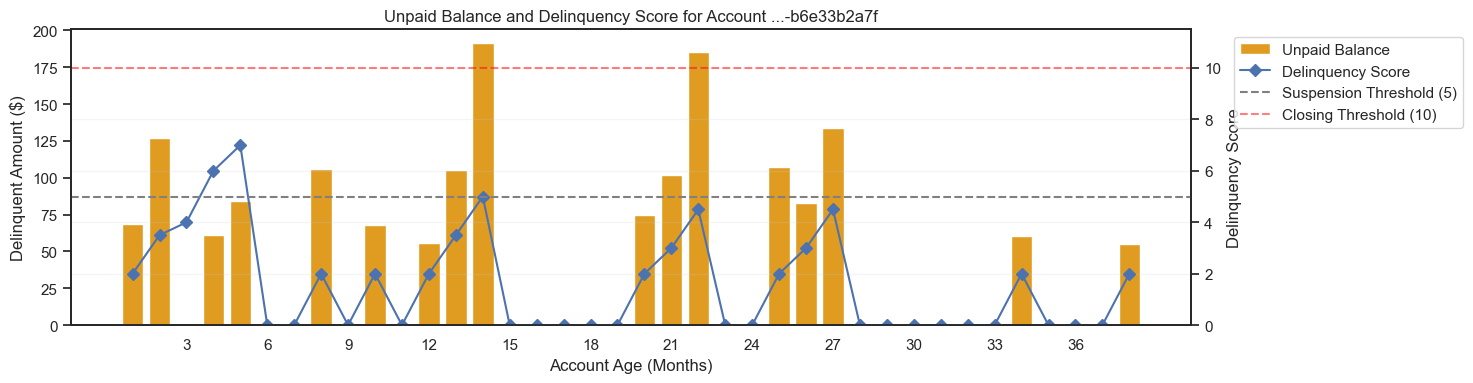

In [21]:
# Sample an account without bad debt but has at least 1 suspension (occurs when delinquency score >= 5)
sample_account_id = balance_snapshots[
    (balance_snapshots['delinquency_score'] >= 5) &
    (~balance_snapshots['account_id'].isin(bad_debts['account_id']))
].sample(1, random_state=0)['account_id'].values[0]
account_balance_snapshots = balance_snapshots[balance_snapshots['account_id'] == sample_account_id].sort_values(by="check_date", ascending=True)
account_balance_snapshots['check_cycle_number'] = range(1, len(account_balance_snapshots) + 1)
plot_account_snapshots_balance_and_delinquency(account_balance_snapshots)


### 🔴 Account C – Chronically Delinquent and Closed

- Customer Type: Residential  
- Reliability Score: 0.23  
- Lifecycle: 28 months, then closed  
- Outcome: Account written off after repeated non-payment  

**Behavioral Pattern:**  
From the start, this customer frequently underpays or skips payments altogether. The delinquency score accumulates steadily and hits 10.0 by month 28. At that point, the account is permanently closed, and the remaining balance is flagged as bad debt.  
📌 *What it shows:* Low-reliability customers display predictable risk trajectories—making early detection and classification crucial.


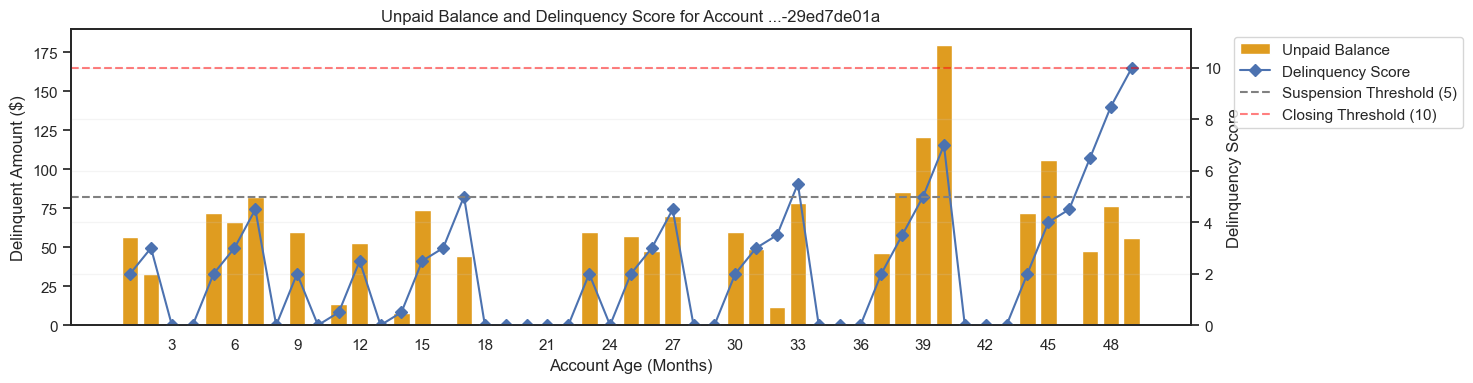

In [22]:
sample_account_id = bad_debts_merged[bad_debts_merged['account_age'] > 12].sample(1, random_state=0)['account_id'].values[0]
account_balance_snapshots = balance_snapshots[balance_snapshots['account_id'] == sample_account_id].sort_values(by="check_date", ascending=True)
account_balance_snapshots['check_cycle_number'] = range(1, len(account_balance_snapshots) + 1)
plot_account_snapshots_balance_and_delinquency(account_balance_snapshots)

These cases highlight how small decisions—month by month—shape the long-term health of an account. And because each escalation has a reason, these patterns become valuable inputs for the classification model in Part 2.

## 6. Simulation Engine and Configuration

The engine behind this simulation isn’t just a data generator—it’s a modular system that blends customer behavior logic with rule-based enforcement to produce behavior that evolves consistently over time. Each component works together to model how financial risk accumulates and how a utility’s credit control system might respond.

### 🔧 Simulation Stack and Setup

The simulation is built in Python, using a modular architecture that separates logic for customers, billing cycles, and enforcement rules. Key components include:

- Python + Pandas/NumPy – Fast, vectorized data manipulation  
- Modular Scripts – Handle customer agents, account lifecycle flow, billing, payments, and penalties  
- Configurable Parameters – Allow flexible tuning of customer mix, behavior profiles, and escalation thresholds  

**Example configuration parameters:**

| Parameter                | Value                             | Description                                      |
|--------------------------|-----------------------------------|--------------------------------------------------|
| num_customers            | 3,000                             | Total customers simulated                        |
| num_cycles               | 72                                | Number of billing months (6 years)               |
| start_date               | 2020-01-01                        | Simulation start date                            |
| reliability_distribution | High: 20%, Med: 50%, Low: 30%     | Customer behavior profiles                       |
| penalty_thresholds       | Suspend: 5, Close: 10             | Delinquency score triggers for escalation        |

These parameters make the simulation flexible and extensible, enabling quick iteration and experimentation with different population dynamics or credit control policies.

### ⚠️ Caveats and Considerations

While the simulation mirrors key utility billing behaviors, it includes a few simplifications:

- **Static Customer Base**  
  All customers are introduced at the start, creating a front-loaded activation pattern with no mid-cycle churn.

- **Simplified Usage**  
  Electricity usage is sampled from fixed ranges without accounting for seasonal trends or outliers.

- **Heuristic Payment Logic**  
  Payment behavior is guided by reliability-based rules rather than real-world calibration.

These choices trade some realism for clarity and control—but the simulation still captures essential risk dynamics and produces a strong foundation for modeling and analytics.



## 7. Recap: Simulating Risk with Behavioral Integrity

This simulation phase wasn’t just about generating data—it was about creating a foundation. By combining probabilistic behavior with rule-based lifecycle logic, we built a synthetic utility dataset that reflects how customer risk truly unfolds over time.

### ✅ What We Built

- A modular simulation engine that mirrors utility billing and delinquency systems  
- A dataset of 3,000+ accounts over 6 years, complete with monthly records, payment behavior, penalties, suspensions, and closures  
- Embedded behavioral signals—from missed payments to recovery attempts—ready for downstream analysis

### 📦 Why It Matters

This dataset gives us full control and explainability. Every penalty, suspension, or closure happens for a reason—and that makes it incredibly valuable for training a risk classification model.  
But as powerful as it is, each snapshot only shows us one point in time. What it doesn’t tell us is the bigger picture: Is this account getting better or worse? Are they consistently stable, or just lucky this month?  
That’s why in Part 2, we’ll aggregate these monthly records into time-aware features—capturing trajectories, trends, and risk signals that allow a model to make smart, forward-looking predictions.

### 👇 What’s Next?

In Part 2, we’ll move from simulation to scoring—engineering behavioral features, designing a labeling strategy, and building a machine learning model that doesn’t just detect risk, but understands why it’s emerging.  
Ready to make this data work? Let’s go deeper.

Got questions, feedback, or ideas for improvement? I’d love to hear from you. Let’s keep building data solutions that make a real impact.

### Linked Project in This Series

This article is Part 1 of a 3-Part Series on Customer Behavioral Risk Modelling and Monitoring:

- **Part 1 – Data Simulation (This article)**  
  We built a rule-driven system that simulates realistic utility billing and credit behavior, creating the full customer lifecycle from activation to closure.

- **Part 2 – Risk Classification Model**  
  We’ll transform this data into engineered features and train a model that predicts which accounts are at risk—long before they close.

- **Part 3 – Power BI Dashboard**  
  Finally, we’ll turn predictions into an interactive dashboard that lets business users explore risk trends, drill into individual accounts, and act with confidence.


